In [2]:
# 加载包
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

import logging
import itertools
import gensim
from gensim import utils



In [3]:
# 训练模型
sentences = LineSentence('wiki.zh.word-utf8.text')
# min_count指定了需要训练词语的最小出现次数，默认为5
# size指定了训练时词向量维度，默认为100
# worker指定了完成训练过程的线程数，默认为1不使用多线程。只有注意安装Cython的前提下该参数设置才有意义
#sg： 用于设置训练算法，默认为0，对应CBOW算法；sg=1则采用skip-gram算法。
model = Word2Vec(sentences, size=128, window=5, min_count=5, workers=4,sg = 1)

In [4]:
# 保存模型

#保存的文件不能利用文本编辑器查看但是保存了训练的全部信息，可以在读取后追加训练
model.save('wiki_zh_word_embedding_128_again.m')
#保存为word2vec文本格式但是保存时丢失了词汇树等部分信息，不能追加训练
model.wv.save_word2vec_format('wiki_zh_word_embedding_128_sg.m', binary=False)

In [5]:
# 加载模型
#model = Word2Vec.load("wiki_zh_word_embedding_128.m")
model=gensim.models.Word2Vec.load("wiki_zh_word_embedding_128_sg.m")

UnpicklingError: invalid load key, '6'.

In [6]:
# 使用模型
items = model.wv.most_similar(u'中国')
print(len(items))
#model.wv.most_similar(u'男人',  u'女人')
for i, item in enumerate(items):
	print(i, item[0], item[1])

10
0 大陆 0.7746931314468384
1 我国 0.6922389268875122
2 经营报 0.6868888139724731
3 北京 0.6853708624839783
4 内地 0.6779896020889282
5 江苏网 0.6692827343940735
6 军网 0.6671650409698486
7 亚洲各国 0.6626995801925659
8 欧中 0.6616818904876709
9 东盟自由贸易区 0.6579015851020813


/root/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [7]:
# 使用模型
# 使用模型
#items = model.wv.most_similar(u'男人',  u'女人')

items = model.wv.most_similar(positive=['国王', '男人'], negative=['王后'])
for i, item in enumerate(items):
	print(i, item[0], item[1])

0 女人 0.6733542680740356
1 胆小鬼 0.6426182985305786
2 家伙 0.6325250864028931
3 重色轻友 0.6242005228996277
4 事来 0.6211745142936707
5 很胖 0.6184269785881042
6 瘦瘦的 0.613095760345459
7 男孩 0.611844003200531
8 浑蛋 0.6114282608032227
9 少来 0.6114280819892883


In [9]:
items = model.wv.most_similar(positive=['机场', '飞机'], negative=['汽车站'])
for i, item in enumerate(items):
	print(i, item[0], item[1])

0 客机 0.7186269760131836
1 降落 0.6968420743942261
2 一架 0.6948869228363037
3 航机 0.6926475763320923
4 波音 0.6880561113357544
5 型飞机 0.6801679134368896
6 空中客车 0.67933189868927
7 坠毁 0.6705143451690674
8 两架 0.6653116941452026
9 货机 0.6627528071403503


/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


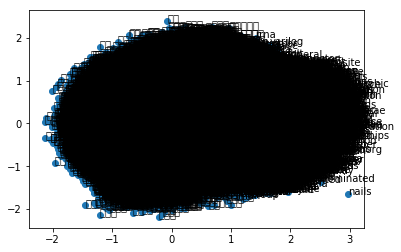

In [10]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline


X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# 可视化展示
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()